<a href="https://colab.research.google.com/github/tung134245/TreeModel_PySpark/blob/main/KDD_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [3]:
!pip install pyspark==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 19.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767582 sha256=160c2c82d1835ac2ea35f8cd07a904b7075a9c6d97aa43210e387d69c2421062
  Stored in directory: /root/.cache/pip/wheels/a0/3f/72/8efd988f9ae041f051c75e6834cd92dd6d13a726e206e8b6f3
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [4]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import Row, SQLContext

In [5]:
sc = SparkContext()

In [6]:
spark = SparkSession(sc)

In [7]:
sqlContext = SQLContext(sc)

In [8]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [9]:
%cd '/content/gdrive/My Drive/BigData/Chapter8'

/content/gdrive/My Drive/BigData/Chapter8


In [10]:
from pyspark.sql.functions import *


In [11]:
from pyspark.sql.functions import to_date, dayofweek, to_timestamp
from pyspark.sql import types
from pyspark.sql.functions import col, udf
from datetime import datetime
from pyspark.sql.types import DateType
from pyspark.sql.functions import year, month, dayofmonth, weekofyear
from pyspark.ml.feature import *

## Đọc dữ liệu

In [15]:
df = spark.read.csv('/content/gdrive/My Drive/BigData/Chapter8/kdd_data/kddcup.data.gz', inferSchema=True, header = False)
df.show(5)

+---+---+----+---+---+-----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|_c0|_c1| _c2|_c3|_c4|  _c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|   _c41|
+---+---+----+---+---+-----+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-------+
|  0|tcp|http| SF|215|45076|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   1| 0.0| 0.0| 0.0| 0.0| 1.0| 0.0| 0.0|   0|   0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0|normal.|
|  0|tcp|http| SF|162| 4528|  0|  0|  0|  0|   0|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   2|   2| 0.0| 0.0| 0.0| 0.0| 1.0| 0.0| 0.0|   1|   1| 1.0| 0.0

In [16]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: integer (nullable = true)
 |-- _c6: integer (nullable = true)
 |-- _c7: integer (nullable = true)
 |-- _c8: integer (nullable = true)
 |-- _c9: integer (nullable = true)
 |-- _c10: integer (nullable = true)
 |-- _c11: integer (nullable = true)
 |-- _c12: integer (nullable = true)
 |-- _c13: integer (nullable = true)
 |-- _c14: integer (nullable = true)
 |-- _c15: integer (nullable = true)
 |-- _c16: integer (nullable = true)
 |-- _c17: integer (nullable = true)
 |-- _c18: integer (nullable = true)
 |-- _c19: integer (nullable = true)
 |-- _c20: integer (nullable = true)
 |-- _c21: integer (nullable = true)
 |-- _c22: integer (nullable = true)
 |-- _c23: integer (nullable = true)
 |-- _c24: double (nullable = true)
 |-- _c25: double (nullable = true)
 |-- _c26: double (nullable = true)
 |-- _c27: d

In [17]:
df.count()

4898431

In [18]:
df.describe().show()

+-------+-----------------+-------+-------+-------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+--------------------+--------------------+------------------+------------------+------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+
|summary|              _c0|    _c1|    _c2|    _c3|               _c4|               _c5|                 _c6|                 _c7|                 _c8|                 _c9|                _c10|    

In [19]:
df.columns

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41']

## Kiểm tra target

In [20]:
df.groupBy('_c41').count().show()

+----------------+-------+
|            _c41|  count|
+----------------+-------+
|    warezmaster.|     20|
|          smurf.|2807886|
|            pod.|    264|
|           imap.|     12|
|           nmap.|   2316|
|   guess_passwd.|     53|
|        ipsweep.|  12481|
|      portsweep.|  10413|
|          satan.|  15892|
|           land.|     21|
|     loadmodule.|      9|
|      ftp_write.|      8|
|buffer_overflow.|     30|
|        rootkit.|     10|
|    warezclient.|   1020|
|       teardrop.|    979|
|           perl.|      3|
|            phf.|      4|
|       multihop.|      7|
|        neptune.|1072017|
+----------------+-------+
only showing top 20 rows



In [23]:
df.select('_c41').distinct().count()

23

In [24]:
dos = ['back.','land.','neptune.','pod.','smurf.','teardrop.']
u2r = ['buffer_overflow.','loadmodule.','perl.','rootkit.',]
probe = ['portsweep.', 'satan.', 'ipsweep.', 'nmap.' ]
r2l = ['ftp_write.',
'guess_passwd.',
'imap.',
'multihop.',
'phf.',
'spy.',
'warezclient.',
'warezmaster.']


def class_target(x):
  if x in dos:
    return 'dos'
  elif x in u2r:
    return 'u2r'
  elif x in probe:
    return 'probe'
  else:
    return 'r2l'



In [29]:
from pyspark.sql.types import *
target = udf(class_target, StringType())
df = df.withColumn('target', target(col('_c41')))

In [31]:
df.groupBy('target').count().show()

+------+-------+
|target|  count|
+------+-------+
|   u2r|     52|
|   r2l| 973907|
| probe|  41102|
|   dos|3883370|
+------+-------+



- DOS: denial-of-service, e.g. syn flood;
- R2L: unauthorized access from a remote machine, e.g. guessing password;
- U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
- probing: surveillance and other probing, e.g., port scanning.

In [32]:
df_target = df.groupBy('target').count().toPandas()
df_target

,target,count
0,u2r,52
1,r2l,973907
2,probe,41102
3,dos,3883370


In [36]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  4 non-null      object
 1   count   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


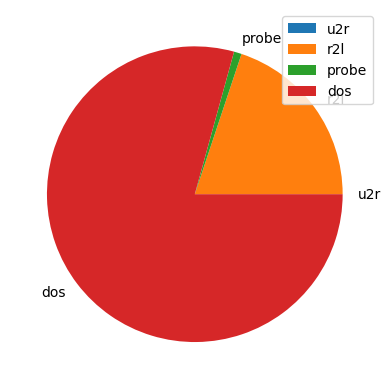

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

y = df_target['count']
label = df_target.target
plt.pie(y, labels = label)
plt.legend()

In [49]:
train_data, test_data = df.randomSplit([0.8, 0.2])

## Tiền xử lý

In [50]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

In [51]:
indexer1 = StringIndexer(inputCol = '_c1', outputCol = 'c1_idx')
indexer2 = StringIndexer(inputCol = '_c2', outputCol = 'c2_idx')
indexer3 = StringIndexer(inputCol = '_c3', outputCol = 'c3_idx')
indexer41 = StringIndexer(inputCol = 'target', outputCol = 'targer_idx')

onehot = OneHotEncoder(inputCols = ['c1_idx', 'c2_idx', 'c3_idx'],
                       outputCols = ['c1_dummy', 'c2_dummy', 'c3_dummy']
                       )


In [53]:
asembler = VectorAssembler(inputCols = ['_c0', 'c1_dummy', 'c2_dummy', 'c3_dummy',
                                        '_c4', '_c5','_c6', '_c7','_c8', '_c9',
                                        '_c10', '_c11','_c12', '_c13','_c14', '_c15',
                                        '_c16', '_c17','_c18', '_c19','_c20', '_c21',
                                        '_c22', '_c23','_c24', '_c25','_c26', '_c27',
                                        '_c28', '_c29','_c30', '_c31','_c32', '_c33',
                                        '_c34', '_c35','_c36', '_c37','_c38', '_c39', '_c40'],
                           outputCol = 'features')

## Xây dụng mô hình

In [54]:
from pyspark.ml.classification import DecisionTreeClassifier, GBTClassifier, RandomForestClassifier

In [55]:
dtc = DecisionTreeClassifier(featuresCol= 'features',
                             labelCol = 'targer_idx',
                             predictionCol='prediction')

In [58]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages = [indexer1, indexer2, indexer3, indexer41, onehot, asembler, dtc])

In [59]:
pipeline = pipeline.fit(train_data)
predictions = pipeline.transform(test_data)

In [62]:
predictions.select('targer_idx', 'prediction').show(5)

+----------+----------+
|targer_idx|prediction|
+----------+----------+
|       2.0|       1.0|
|       2.0|       2.0|
|       2.0|       2.0|
|       2.0|       1.0|
|       2.0|       2.0|
+----------+----------+
only showing top 5 rows



## Đánh gúa mô hình

In [64]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [65]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol = 'targer_idx', predictionCol='prediction')

In [66]:
acc_evaluator.evaluate(predictions)

0.9983023185764299

In [68]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [70]:
preds_labels = predictions.select(['prediction', 'targer_idx']).withColumn('label', col('targer_idx').cast(FloatType())).orderBy('prediction')

In [71]:
preds_labels = preds_labels.select(['prediction', 'label'])


In [72]:
metrics = MulticlassMetrics(preds_labels.rdd.map(tuple))

In [73]:
import pandas as pd

In [76]:
matrix = pd.DataFrame(metrics.confusionMatrix().toArray())
matrix

,0,1,2,3
0,775937.0,208.0,20.0,0.0
1,160.0,194371.0,22.0,1.0
2,80.0,1109.0,6969.0,0.0
3,7.0,5.0,0.0,0.0


In [87]:
metrics.recall('1')

0.9990593871110335

## Dự đoán mẫu mới

In [84]:
df_new = spark.read.csv('/content/gdrive/My Drive/BigData/Chapter8/kdd_data/kddcup.testdata.unlabeled.gz', inferSchema=True, header = False)
df_new.show(5)

+---+---+-------+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|_c1|    _c2|_c3|_c4|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_c30|_c31|_c32|_c33|_c34|_c35|_c36|_c37|_c38|_c39|_c40|
+---+---+-------+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  0|udp|private| SF|105|146|  0|  0|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   1| 0.0| 0.0| 0.0| 0.0| 1.0| 0.0| 0.0|   1|   1| 1.0| 0.0| 1.0| 0.0| 0.0| 0.0| 0.0| 0.0|
|  0|udp|private| SF|105|146|  0|  0|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   1| 0.0| 0.0| 0.0| 0.0| 1.0| 0.0| 0.0| 255| 254| 1.0|0.01| 0.0| 0.0| 0.0| 0.0| 0.0| 

In [85]:
df_new.count()

2984154

In [86]:
predictions_new = pipeline.transform(df_new)
predictions_new.select('features', 'prediction').show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
|(119,[4,72,82,83,...|       1.0|
+--------------------+----------+
only showing top 20 rows

